<a href="https://colab.research.google.com/github/Shilajit-CR7/ML-Works/blob/main/SVM(Kernals%2CGridSearchCv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
x,y = make_circles(n_samples=500,noise=0.05)

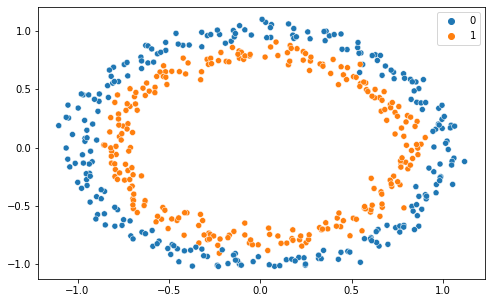

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = x[:,0],y=x[:,1],hue=y,data=x)
plt.show()

In [ ]:
def phi(x):
    x1 = x[:,0]
    x2 = x[:,1]
    x3 = x1**2 + x2**2
    x_ = np.zeros((x.shape[0],3))
    x_[:,:-1] = x
    x_[:,-1] = x3
    return x_

In [ ]:
x_ = phi(x)

In [ ]:
x_

array([[ 0.8669757 ,  0.50488275,  1.00655345],
       [ 0.08581077,  0.90354836,  0.82376313],
       [ 0.71891306, -0.33266987,  0.62750524],
       ...,
       [ 0.89184267,  0.58200713,  1.13411565],
       [-0.13584564, -0.96433302,  0.94839221],
       [-0.77590291,  0.24445324,  0.6617827 ]])

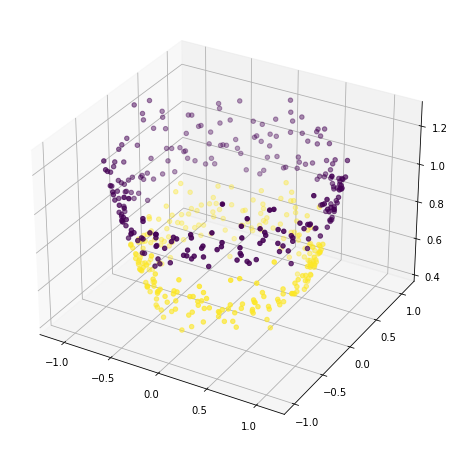

In [ ]:

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x_[:,0],x_[:,1],x_[:,2],c=y,depthshade=True)
plt.show()

# Logistic Classifier


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
model = LogisticRegression()

In [ ]:
model = model.fit(x,y)
model.score(x,y)

0.498

In [ ]:
acc = cross_val_score(model,x,y,cv=5)
acc.mean()

0.42800000000000005

In [ ]:
model = model.fit(x_,y) ##Higher dimension accuracy 
model.score(x_,y)

0.984

In [ ]:
acc = cross_val_score(model,x_,y,cv=5)
acc.mean()

0.984

# SVM

In [ ]:
from sklearn import svm

In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
model = model.fit(x,y)

In [ ]:
acc = cross_val_score(model,x,y,cv=5)
acc.mean()

0.45

In [ ]:
model = svm.SVC(kernel='rbf')
model = model.fit(x,y)
acc = cross_val_score(model,x,y,cv=5)
acc.mean()

0.9799999999999999

In [ ]:
model = svm.SVC(kernel='poly')
model = model.fit(x,y)
acc = cross_val_score(model,x,y,cv=5)
acc.mean()

0.45600000000000007

In [ ]:
x1 = x[:,0]
x2 = x[:,1]

In [ ]:
#Coustom kernal
def ck(x1,x2):
    return np.square(np.dot(x1,x2.T))
    

In [ ]:
model = svm.SVC(kernel=ck)
model = model.fit(x,y)
acc = cross_val_score(model,x,y,cv=5)
acc.mean()

0.984

# MNIST DATSET 

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

In [ ]:
params = [
    {
        'kernel':['linear','rbf','poly','sigmoid'],
        'C':[0.1,0.2,0.3,0.5,1,2,5]
    }
]

In [ ]:
df = load_digits()
x = df.data
y = df.target

In [ ]:
k = svm.SVC

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
model = LogisticRegression()
model = model.fit(x,y)
acc = cross_val_score(model,x,y,cv=5)
acc.mean()

C:\Users\Shilajit-CR7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shilajit-CR7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

0.9137650882079852

In [ ]:
model = svm.SVC(kernel='linear')
model = model.fit(x,y)
acc = cross_val_score(model,x,y,cv=5)
acc.mean()

0.9476973073351903

In [ ]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

# GridSearchCV

In [ ]:
params = [
    {
        'kernel':['linear','rbf','poly','sigmoid'],
        'C':[0.1,0.2,0.3,0.5,1,2,5]
    }
]

In [ ]:
gs = GridSearchCV(estimator=svm.SVC(),param_grid=params,scoring='accuracy',cv=5)
gs.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.5, 1, 2, 5],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             scoring='accuracy')

In [ ]:
gs.best_params_

{'C': 5, 'kernel': 'rbf'}

In [ ]:
model = svm.SVC(kernel='rbf',C=5)
model = model.fit(x,y)
acc = cross_val_score(model,x,y,cv=5)
acc.mean()

0.9738502011761063